In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data from csv file

ds_df = pd.read_csv('day (3).csv')

In [3]:
# Checking head of the dataset
 
ds_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the shape of dataframe
ds_df.shape

(730, 16)

In [5]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# to check the null values in column data

ds_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
ds_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [8]:
# insights

In [9]:
ds_df.season = ds_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [10]:
ds_df.mnth = ds_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [11]:
#to map weekday column

ds_df.weekday = ds_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [12]:
ds_df.weathersit = ds_df.weathersit.map({1:'sunny',2:'cloudy',3:'Lightrain',4:'Heavyrain'})

In [13]:
# checking head of the dataset

ds_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,sunny,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,sunny,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,sunny,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


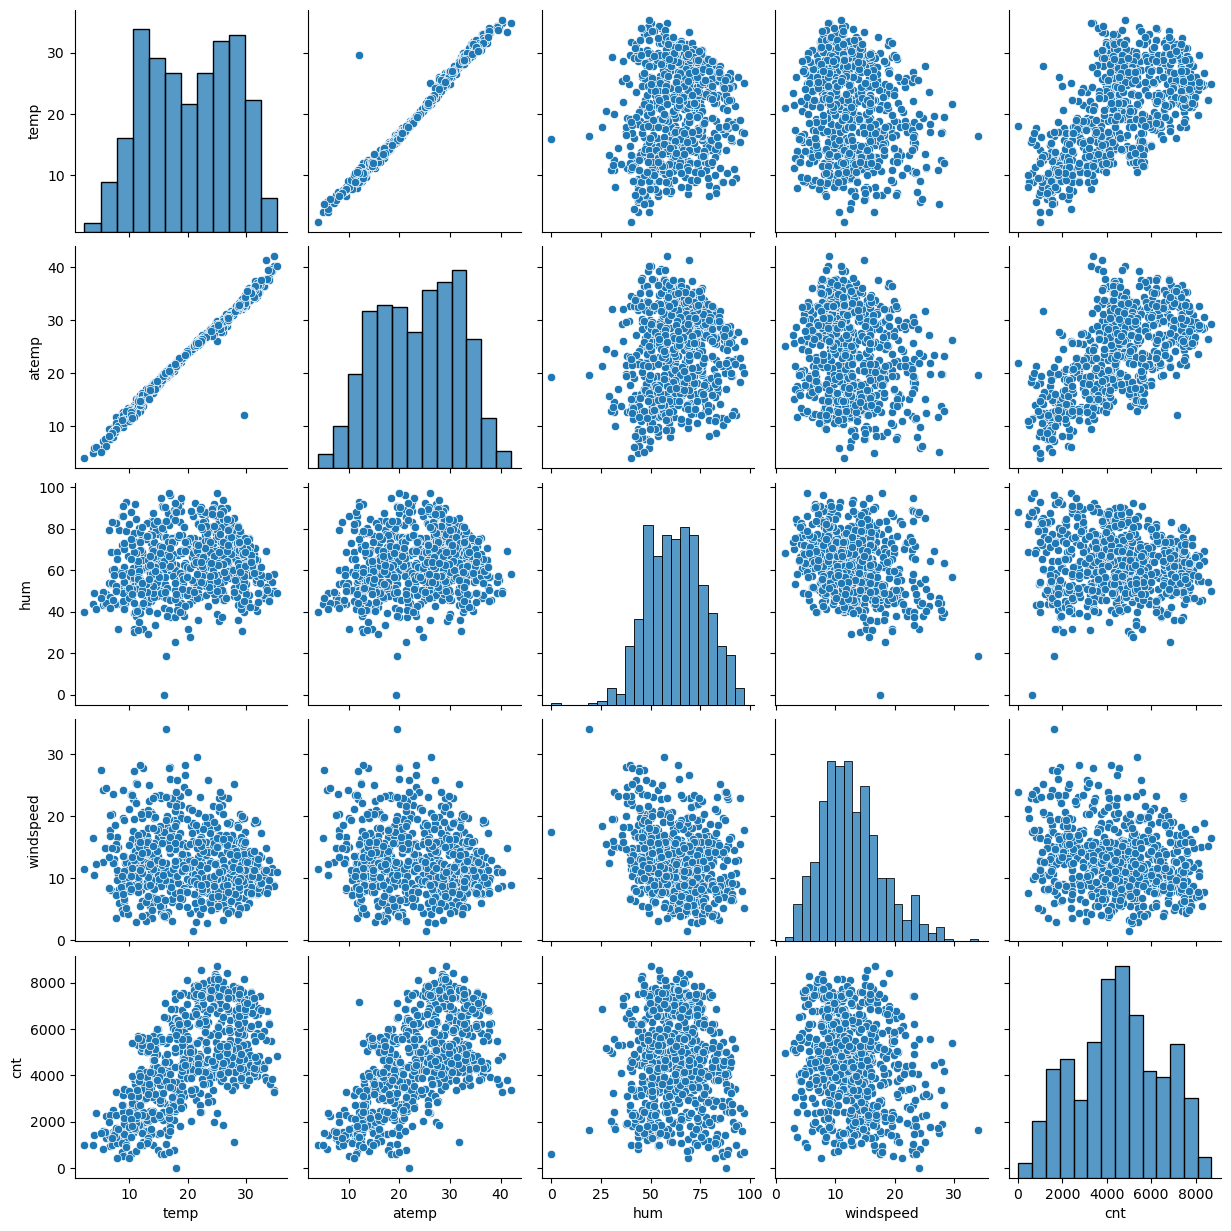

In [15]:
#Visualse Numeric Variables
bike = ds_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(bike)
plt.show()

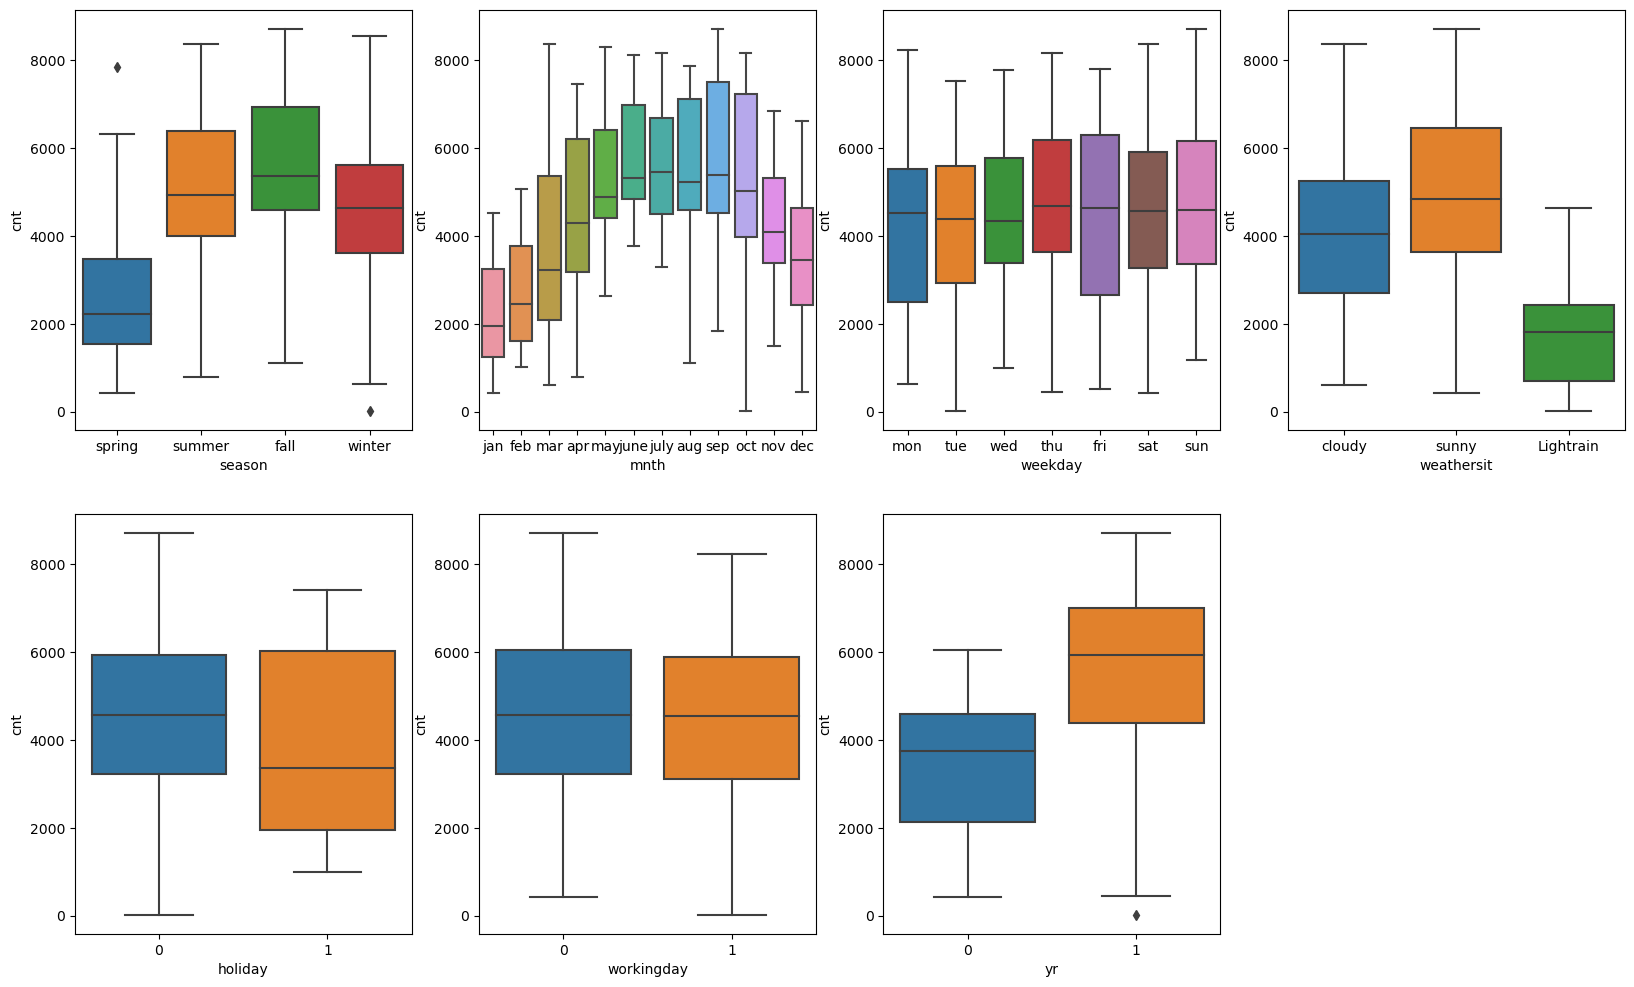

In [16]:
# to visualise categorical columns


plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = ds_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = ds_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = ds_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = ds_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = ds_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = ds_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = ds_df)
plt.show()

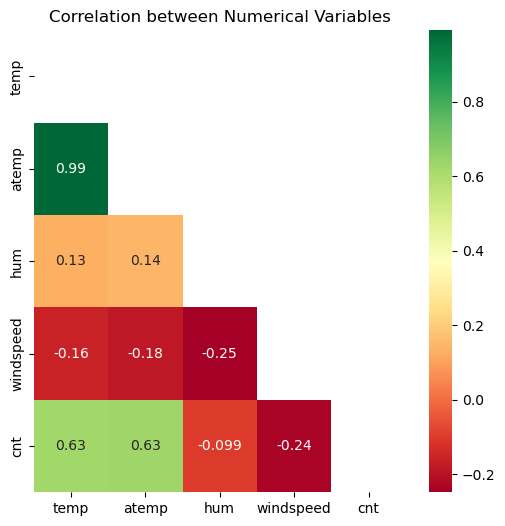

In [17]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
matrix = np.triu(ds_df[['temp','atemp','hum','windspeed','cnt']].corr())
sns.heatmap(ds_df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

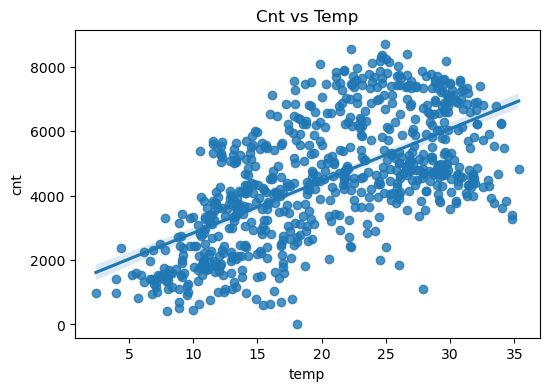

In [18]:
plt.figure(figsize=(6,4))
plt.title("Cnt vs Temp")
sns.regplot(data=ds_df,y="cnt",x="temp")
plt.show()

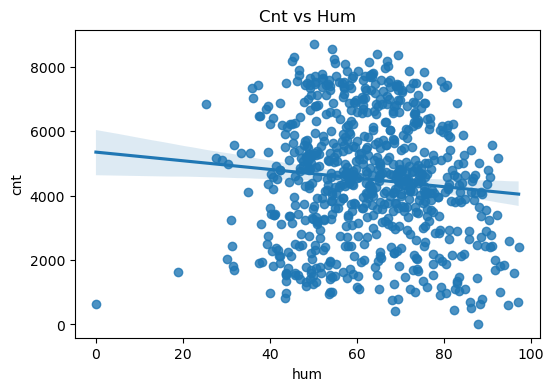

In [19]:
plt.figure(figsize=(6,4))
plt.title('Cnt vs Hum')
sns.regplot(data=ds_df, y='cnt', x='hum')
plt.show()


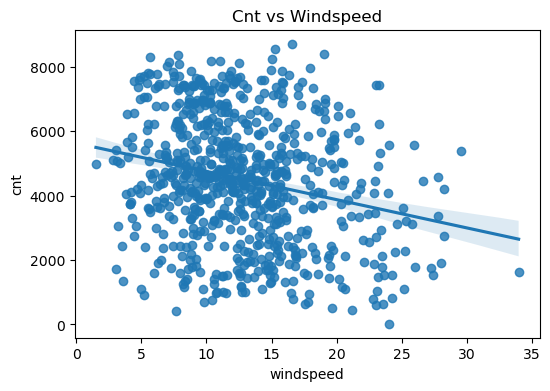

In [20]:
plt.figure(figsize=(6,4))
plt.title('Cnt vs Windspeed')
sns.regplot(data=ds_df, y='cnt', x='windspeed')
plt.show()

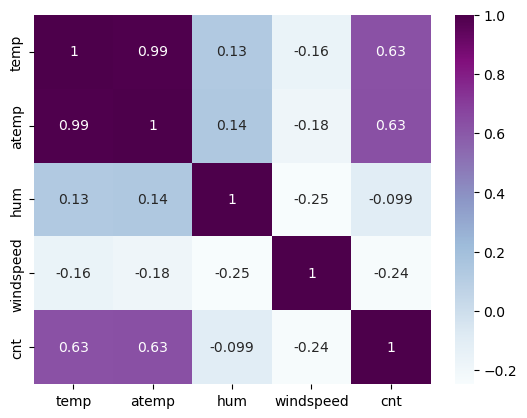

In [21]:
# to Check continuous variables relationship 

sns.heatmap(ds_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuPu', annot = True)
plt.show()

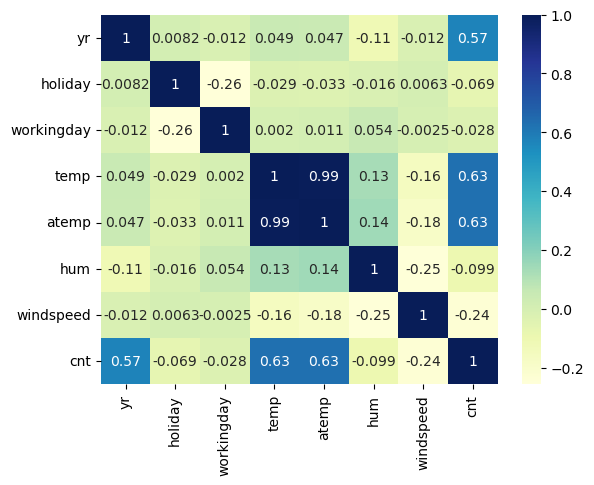

In [22]:
# Correlation for numeric variables
num_columns = ds_df.select_dtypes(include=['float64', 'int64'])

#calculating correlation matrix
cor = num_columns.corr()

# Plot heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [23]:
# creating Dummy variable for month, weekday, season variables and weathersit

months_df=pd.get_dummies(ds_df.mnth,drop_first=True,dtype='int')
weekdays_df=pd.get_dummies(ds_df.weekday,drop_first=True,dtype='int')
weathersit_df=pd.get_dummies(ds_df.weathersit,drop_first=True,dtype='int')
seasons_df=pd.get_dummies(ds_df.season,drop_first=True,dtype='int')

In [24]:
months_df.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [25]:
weekdays_df.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [26]:
weathersit_df.head()

,cloudy,sunny
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [27]:
seasons_df.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [28]:
# Merging  the dataframes. 

ds_df = pd.concat([ds_df,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)

In [29]:
ds_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,cloudy,sunny,spring,summer,winter
0,spring,0,jan,0,mon,1,cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,1,0,0
1,spring,0,jan,0,tue,1,cloudy,14.902598,17.68695,69.6087,...,0,0,0,1,0,1,0,1,0,0
2,spring,0,jan,0,wed,1,sunny,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,1,1,0,0
3,spring,0,jan,0,thu,1,sunny,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,1,1,0,0
4,spring,0,jan,0,fri,1,sunny,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,1,0,0


In [30]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    int32  
 13  dec         730 non-null    int32  
 14  feb         730 non-null    int32  
 15  jan         730 non-null    int32  
 16  july        730 non-null    int32  
 17  june        730 non-null    int32  
 18  mar         730 non-null    int32  
 19  may         730 non-null    i

In [31]:
# to drop unnecessary columns

ds_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [32]:
ds_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,cloudy,sunny,spring,summer,winter
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,1,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,1,0,0


In [33]:
ds_df.shape

(730, 30)

In [34]:
# to split the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(ds_df, train_size = 0.7, random_state = 100)

In [35]:
df_train.shape

(510, 30)

In [36]:
df_test.shape

(220, 30)

In [37]:
# use MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [38]:


num_variables = ['temp','atemp','hum','windspeed','cnt']
df_train[num_variables] = scaler.fit_transform(df_train[num_variables])

In [39]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,cloudy,sunny,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,1,0,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,1,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,1,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,1,0,0,1,0


In [40]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,cloudy,sunny,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.625490,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.484471,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


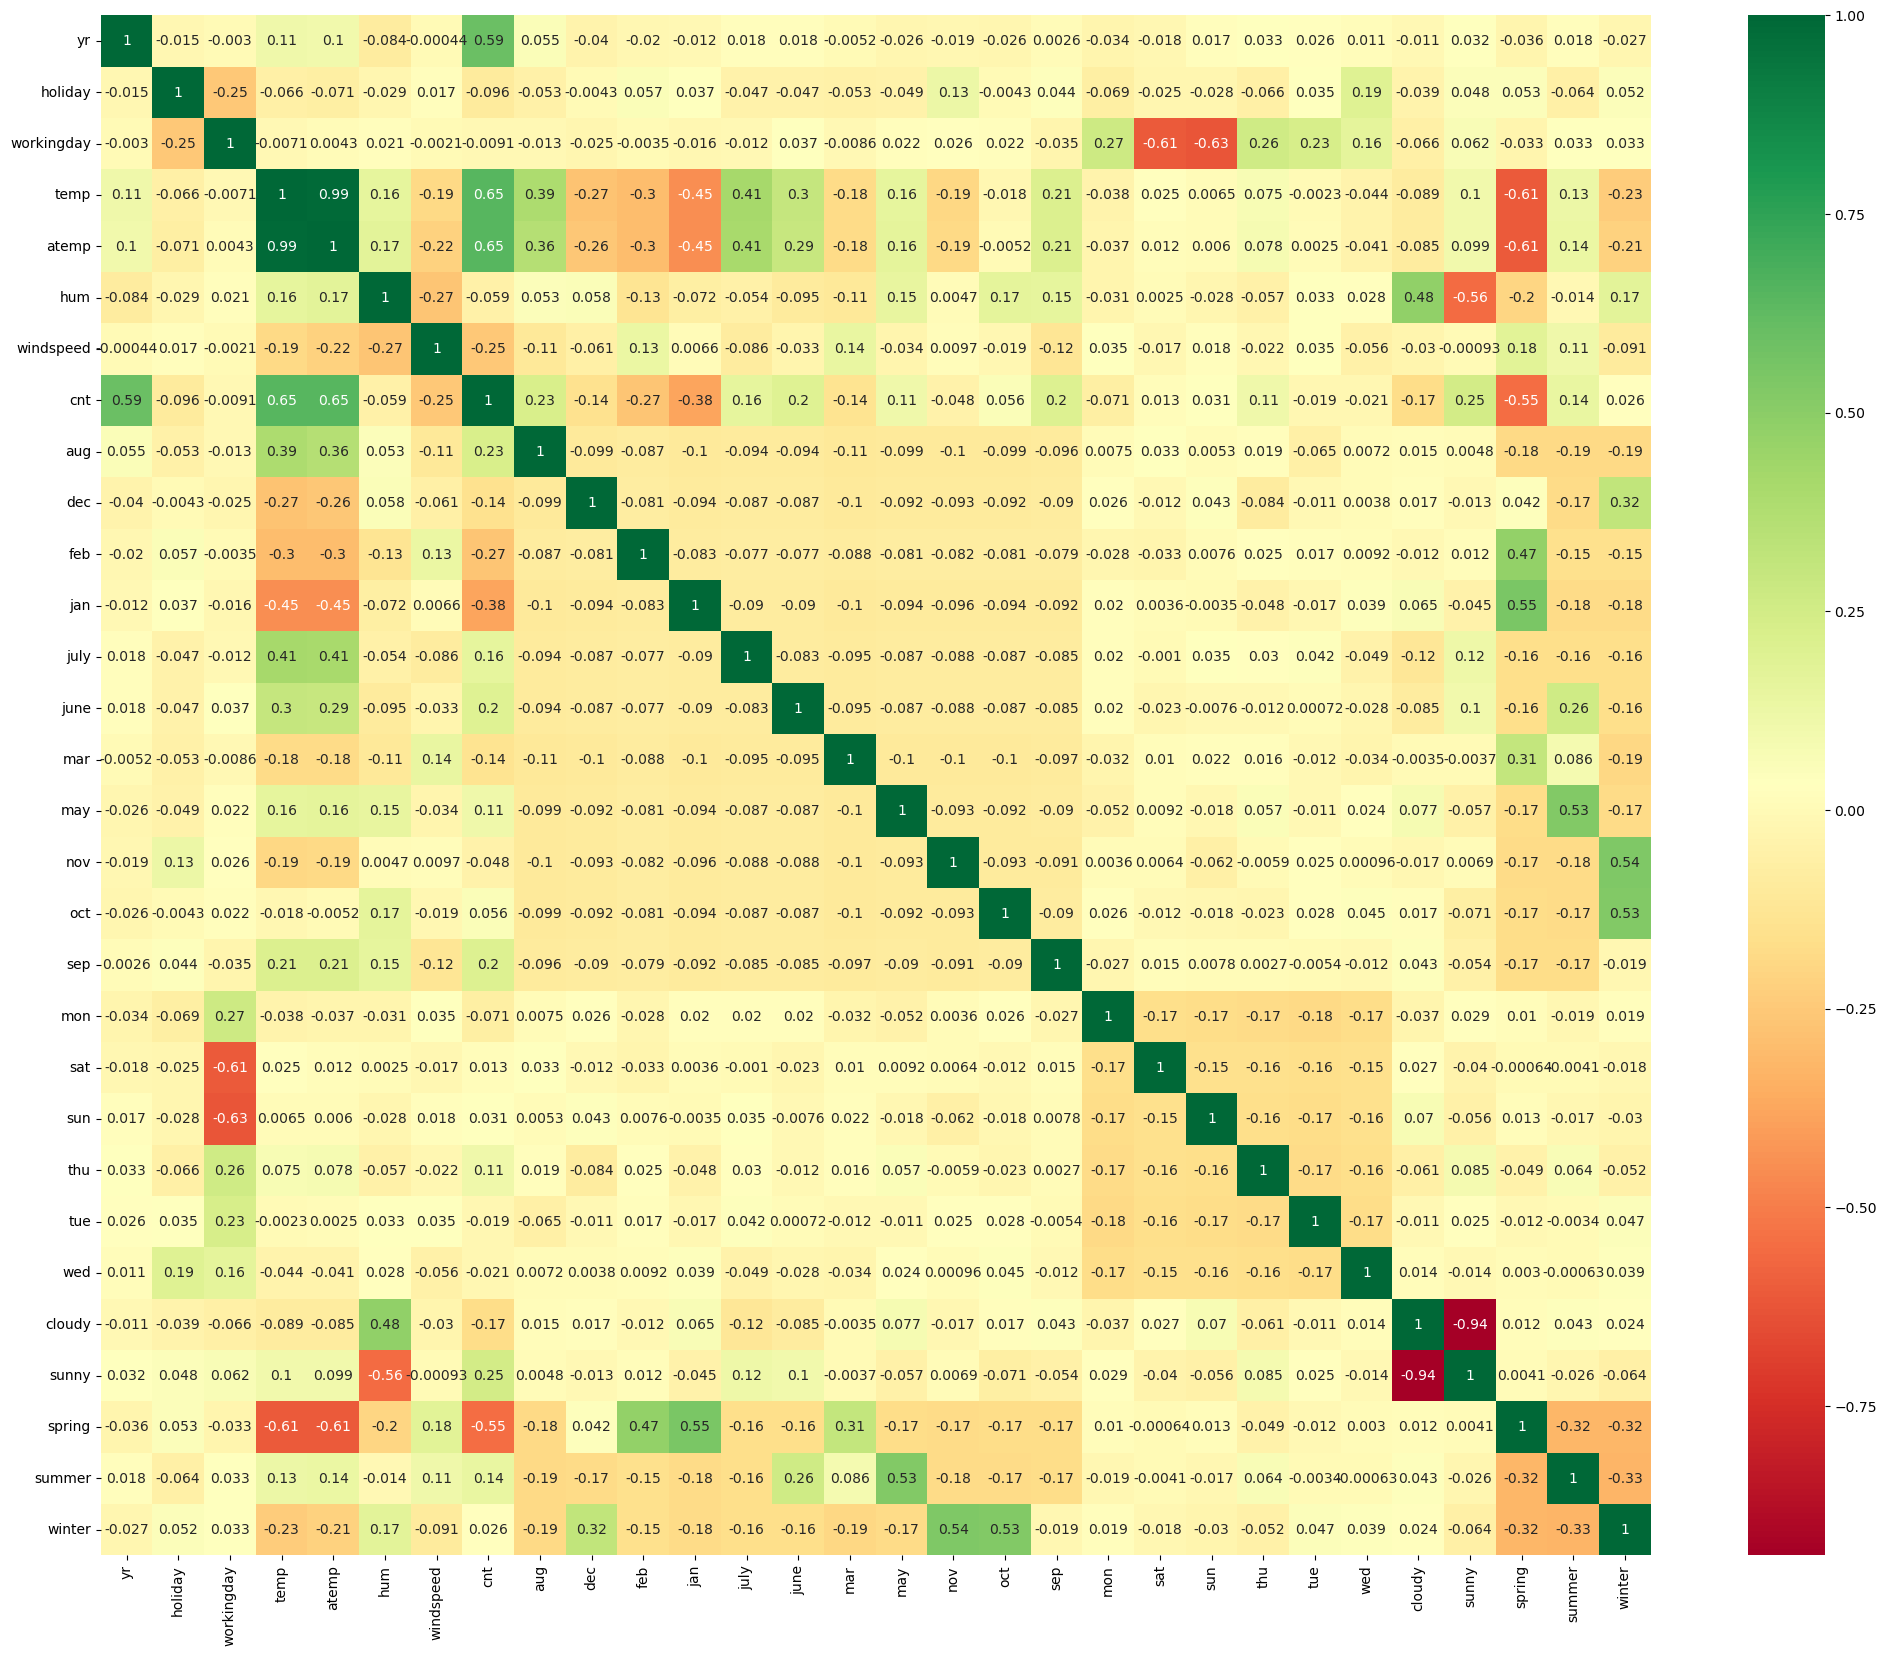

In [41]:
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

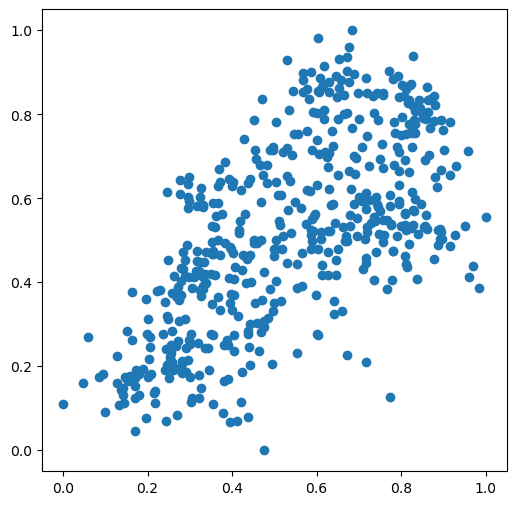

In [42]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [43]:


y_train = df_train.pop('cnt')
X_train = df_train

In [44]:
#  to Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [45]:
#List of variables which are  in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('cloudy', True, 1),
 ('sunny', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [46]:
# to select the selected variable 

columns = X_train.columns[rfe.support_]
print(columns)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'cloudy', 'sunny', 'spring', 'summer', 'winter'],
      dtype='object')


In [47]:
# check columns which got rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [48]:
# Generic function for calculating VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [49]:
# dataframes with RFE selecting variables

X_train_rfe = X_train[columns]

In [50]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,26.33
2,temp,25.12
11,sunny,15.65
10,cloudy,9.30
12,spring,5.75
4,windspeed,4.67
14,winter,4.53
13,summer,3.30
0,yr,2.10
8,nov,1.91


In [51]:
X_train_lm_1 = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm_1).fit()  
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          8.15e-189
Time:                        16:15:26   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0732      0.048      1.540      0.1

In [52]:
#  high VIF values seen in humidity so we can drop 
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# to Run the Calculate VIF function for next model
calculateVIF(X_train_new)

,Features,VIF
10,sunny,15.65
2,temp,14.02
9,cloudy,8.82
3,windspeed,4.66
11,spring,4.41
13,winter,3.36
12,summer,2.78
0,yr,2.08
7,nov,1.89
5,jan,1.74


In [53]:
X_train_lm_2 = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()     
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          4.75e-186
Time:                        16:15:26   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0467      0.039     -1.194      0.2

In [54]:
# in this sunny shows high VIF values ,we can drop it
X_train_new = X_train_new.drop(['sunny'], axis = 1)

# to Calculate VIF function for next model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.60
10,spring,2.89
12,winter,2.89
11,summer,2.24
0,yr,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
9,cloudy,1.54


In [55]:
X_train_lm_3 = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train, X_train_lm_3).fit()     

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     146.7
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.75e-160
Time:                        16:15:27   Log-Likelihood:                 441.27
No. Observations:                 510   AIC:                            -854.5
Df Residuals:                     496   BIC:                            -795.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2182      0.036      6.008      0.0

In [56]:
# 'nov' variable has high p-value so we can drop
X_train_new = X_train_new.drop(['nov'], axis=1)


calculateVIF(X_train_new)

,Features,VIF
2,temp,5.14
3,windspeed,4.56
9,spring,2.89
10,summer,2.24
0,yr,2.07
11,winter,2.02
5,jan,1.65
6,july,1.59
8,cloudy,1.54
7,sep,1.34


In [57]:
X_train_lm_4 = sm.add_constant(X_train_new)

lr_4 = sm.OLS(y_train, X_train_lm_4).fit()    

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     158.8
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.28e-161
Time:                        16:15:27   Log-Likelihood:                 440.73
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     497   BIC:                            -800.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2090      0.035      5.940      0.0

In [58]:
# We can drop 'dec' variable because it is showing high p-value
X_train_new = X_train_new.drop(['dec'], axis=1)

# Runing to Calculate VIF function for next model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.56
8,spring,2.75
9,summer,2.24
0,yr,2.07
10,winter,1.76
4,jan,1.61
5,july,1.59
7,cloudy,1.54
6,sep,1.33


In [59]:
X_train_lm_5 = sm.add_constant(X_train_new)

lr_5 = sm.OLS(y_train, X_train_lm_5).fit()    


print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.2
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          2.65e-162
Time:                        16:15:27   Log-Likelihood:                 440.27
No. Observations:                 510   AIC:                            -856.5
Df Residuals:                     498   BIC:                            -805.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2010      0.034      5.882      0.0

In [60]:
X_train_new = X_train_new.drop(['jan'], axis=1)

# Run the Calculate VIF function for model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.54
8,summer,2.23
7,spring,2.08
0,yr,2.06
9,winter,1.75
4,july,1.58
6,cloudy,1.53
5,sep,1.33
1,holiday,1.04


In [61]:
X_train_lm_6 = sm.add_constant(X_train_new)

lr_6 = sm.OLS(y_train,X_train_lm_6).fit()  


print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          7.37e-163
Time:                        16:15:27   Log-Likelihood:                 438.86
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     499   BIC:                            -809.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1871      0.033      5.638      0.0

In [62]:
# dropping 'Spring' variable as it shows high p-value
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Calculate VIF function for the next model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.06
3,windspeed,3.03
0,yr,2.00
7,summer,1.76
4,july,1.52
6,cloudy,1.47
8,winter,1.43
5,sep,1.28
1,holiday,1.03


In [63]:
X_train_lm_7 = sm.add_constant(X_train_new)

lr_7 = sm.OLS(y_train,X_train_lm_7).fit()    


print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.7
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          1.16e-162
Time:                        16:15:27   Log-Likelihood:                 435.63
No. Observations:                 510   AIC:                            -851.3
Df Residuals:                     500   BIC:                            -808.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1180      0.019      6.269      0.0

In [64]:
# as 'Jul' variable has high p-value we can drop it
X_train_new = X_train_new.drop(['july'], axis = 1)


calculateVIF(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,2.99
0,yr,1.99
6,summer,1.57
5,cloudy,1.46
7,winter,1.35
4,sep,1.20
1,holiday,1.03


In [65]:
X_train_lm_8 = sm.add_constant(X_train_new)

lr_8 = sm.OLS(y_train,X_train_lm_8).fit()   


print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.5
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          7.07e-163
Time:                        16:15:27   Log-Likelihood:                 433.31
No. Observations:                 510   AIC:                            -848.6
Df Residuals:                     501   BIC:                            -810.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1223      0.019      6.518      0.0

In [66]:
# to Check what parameters we have obtained
lr_8.params

const        0.122344
yr           0.238475
holiday     -0.084856
temp         0.549679
windspeed   -0.181655
sep          0.090997
cloudy      -0.065098
summer       0.088128
winter       0.115191
dtype: float64

In [67]:
X_train_lm_8.head()

,const,yr,holiday,temp,windspeed,sep,cloudy,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,1,0
111,1.0,0,0,0.345824,0.380981,0,1,1,0


In [68]:
y_train_pred = lr_8.predict(X_train_lm_8)

normality of error terms

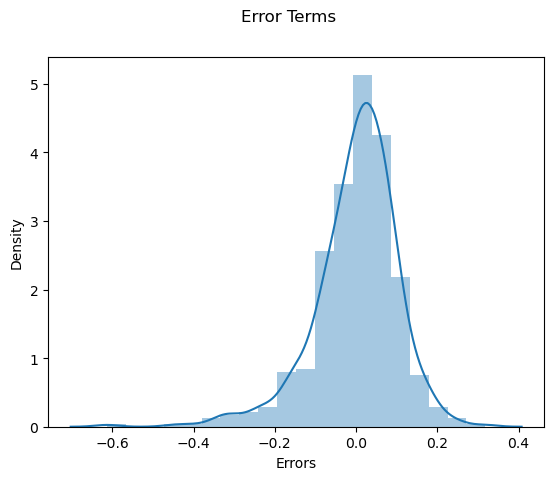

In [69]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms')                 
plt.xlabel('Errors')                         
plt.show()

normal distribution is being followed by error terms.

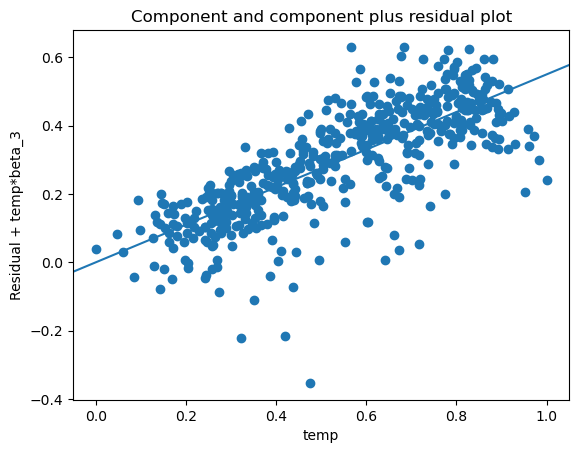

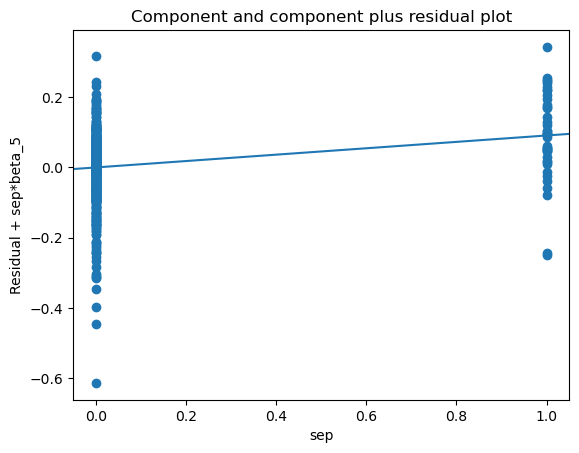

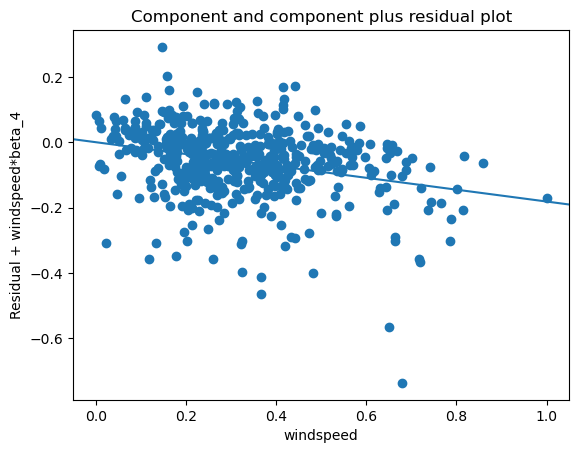

In [70]:
# Linear relationship validation with CCPR plot


sm.graphics.plot_ccpr(lr_8, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_8, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_8, 'windspeed')
plt.show()

 from above visualizations we can see the linearity.

 using final model to make predictions

In [71]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,cloudy,sunny,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,1,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,1,0,0,0,1,0,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,1,0,0,0,0,0,1,0,1,0


In [72]:
num_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,cloudy,sunny,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,1,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,1,0,1,0


In [74]:
y_test = df_test.pop('cnt')
X_test = df_test

In [75]:
column1 = X_train_new.columns

X_test = X_test[column1]

# to ddd constant variable to test dataframe
X_test_lm_8 = sm.add_constant(X_test)

In [76]:
y_pred = lr_8.predict(X_test_lm_8)

In [77]:
# Calculating R-squared score on the test set

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7689089014148008


model evaluation

Text(0, 0.5, 'y_pred')

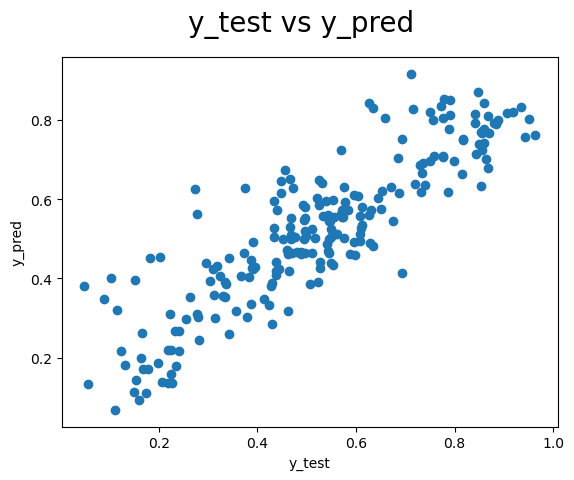

In [78]:
# Plot y_test and y_pred 

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test')
plt.ylabel('y_pred') 

In [79]:
round(lr_8.params,4)

const        0.1223
yr           0.2385
holiday     -0.0849
temp         0.5497
windspeed   -0.1817
sep          0.0910
cloudy      -0.0651
summer       0.0881
winter       0.1152
dtype: float64

#equation of best fitted line

$ cnt = 0.1223 \times  constant + 0.2385  \times  year - 0.0849 \times holiday + 0.5497 \times temperature - 0.1817 \times windspeed + 0.0910 \times september - 0.0651 \times cloudy + 0.0881 \times summer + 0.1152 \times winter $


In [80]:
# to Calculate Adjusted-R^2 value for test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7601


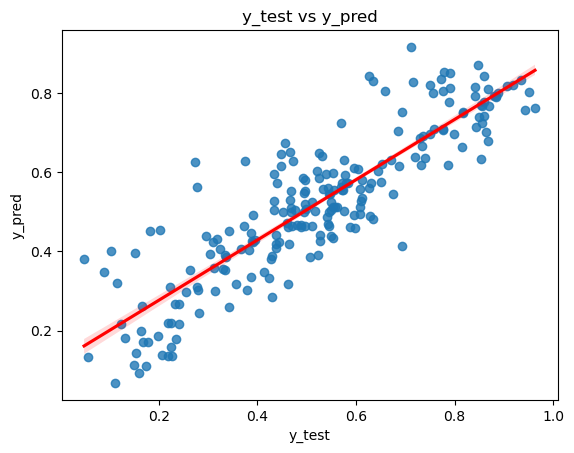

In [81]:
#to Visualise the fit on the test data
# plot a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

### Comparision between Training and Testing dataset:
    
- Train dataset R^2 : 0.787
- Test dataset R^2 : 0.7689
- Train dataset Adjusted R^2 : 0.784
- Test dataset Adjusted R^2 : 0.7601
### Demand of bikes depend on columns i.e., yr, holiday, temp, windspeed, sep,cloudy, summer and winter